# Image Segmentation with CellPose
CellPose is a deep-learning based segmentation algorithm for cells and nuclei in microscopy images. It comes with pretrained models we demonstrate in this notebook. It is meant to be executed in Google Colab.

See also
* [Cellpose in Nature Methods](https://www.nature.com/articles/s41592-020-01018-x)
* [Cellpose on github](https://github.com/MouseLand/cellpose)
* [Cellpose example notebook](https://github.com/MouseLand/cellpose/blob/master/notebooks/run_cellpose.ipynb)

We start by installing necessary Python libraries.

In [1]:
!pip install cellpose stackview ipycanvas==0.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import stackview
from cellpose import models, io
import numpy as np
from skimage.data import human_mitosis
from skimage.io import imsave

StackViewNDArray([[ 8,  8,  8, ..., 63, 78, 75],
                  [ 8,  8,  7, ..., 67, 71, 71],
                  [ 9,  8,  8, ..., 53, 64, 66],
                  ...,
                  [ 8,  9,  8, ..., 17, 24, 59],
                  [ 8,  8,  8, ..., 17, 22, 55],
                  [ 8,  8,  8, ..., 16, 18, 38]], dtype=uint8)
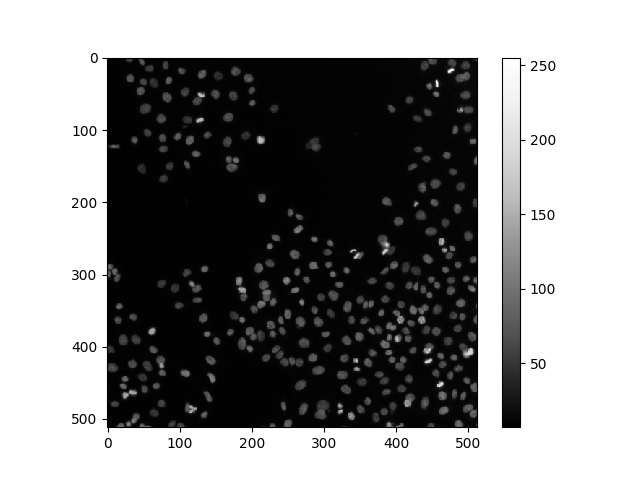
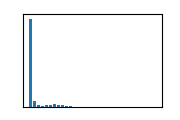

In [3]:
image = human_mitosis()
stackview.insight(image)

## Loading a pretrained model
CellPose comes with a number of pretrained models, e.g. for segmenting images showing cells or nuclei. We will just load a model for segmenting nuclei.

In [4]:
model = models.Cellpose(gpu=False, model_type='nuclei')

We let the model "evaluate" the image to produce masks of segmented nuclei.

In [5]:
channels = [0,0] # This means we are processing single-channel greyscale images.

masks, flows, styles, diams = model.eval(image, diameter=None, channels=channels)

StackViewNDArray([[0, 0, 0, ..., 4, 4, 4],
                  [0, 0, 0, ..., 4, 4, 4],
                  [0, 0, 0, ..., 4, 4, 4],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
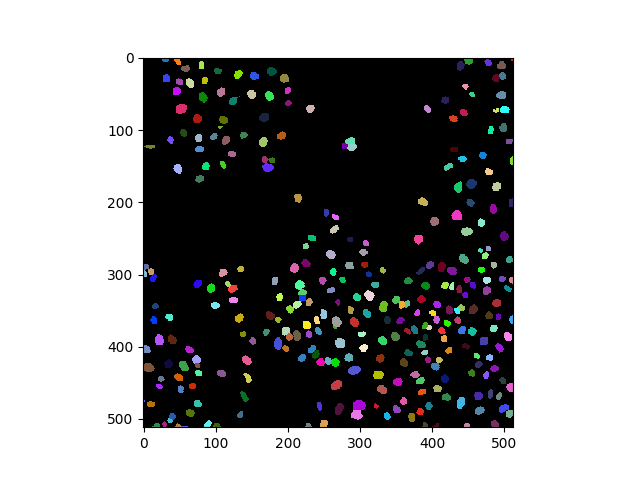

In [6]:
labels = masks.astype(np.uint32)
stackview.insight(labels)

## Result visualization
Cell / nuclei segmentation results can be checked best if the resulting label image is overlaid to the original image or by drawing outlines around segmented regions.

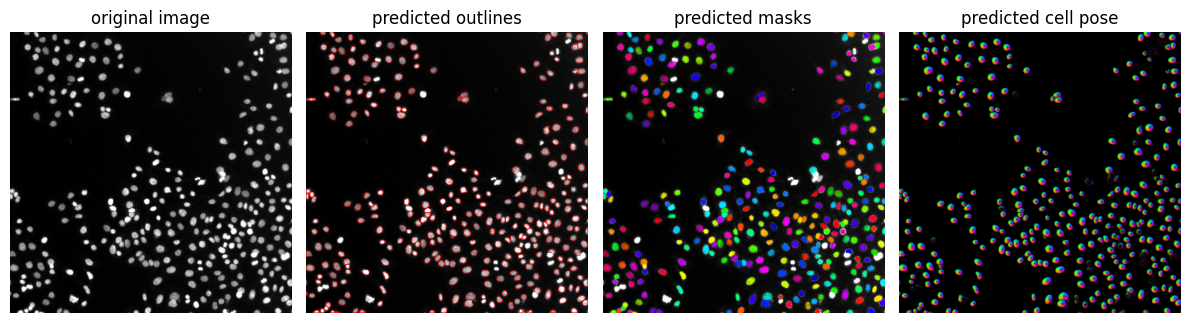

In [7]:
from cellpose import plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, image, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

## Saving results to Google Drive
We now connect with Goolge Drive and can save the result there to download it.

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
imsave('/content/gdrive/My Drive/human_mitosis_labels_cellpose.tif', labels)

<ipython-input-9-00abae150869>:1: UserWarning: /content/gdrive/My Drive/human_mitosis_labels_cellpose.tif is a low contrast image
  imsave('/content/gdrive/My Drive/human_mitosis_labels_cellpose.tif', labels)


## Exercise
Annotate some nuclei in the `human_mitosis` dataset, e.g. using Napari. Afterwards, use these spare annotions to measure the quality of the `labels` image that has been stored to your Google Drive above.

Is it better or worse than the StarDist-based segmentation?